### 1. Loading dependencies and data

In [1]:
## Se cargan los datos usando la librearía de UCIM como se indica en la página
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets

## Concat data to get an unique dataframe
df = pd.concat([X, y], axis=1)
df.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


### 2. Preprocessing data

In [2]:
## Null values
display(df.isnull().sum(axis=0))

## There is only 16 null in sigle column (Bare_nuclei) values in dataset 
## so drop them (non significant information loss assumption)
df.dropna(inplace=True)

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

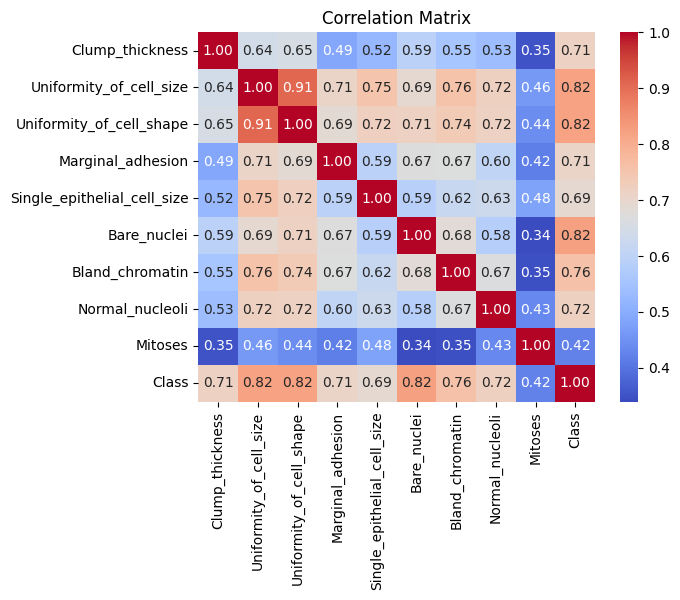

In [3]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


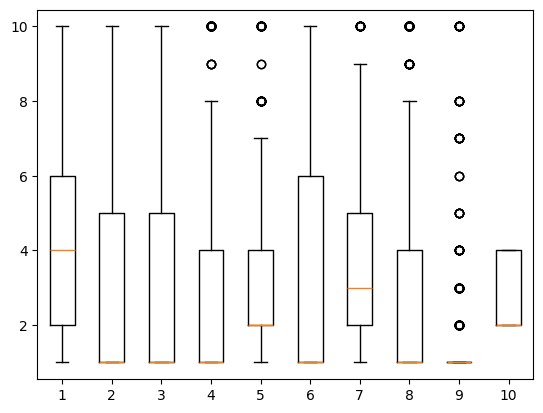

In [4]:
## No need to encode data as features are numerical
display(df.describe())

plt.boxplot(df)
plt.show()

In [5]:
## Count prediction varaible objetive labels distribution
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [6]:
## There is a class imbalance so
g = df.groupby('Class')
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
balanced_df

C:\Users\ccsar\AppData\Local\Temp\ipykernel_20864\1069040515.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
Class                                                                           
2     0                  5                        1                         1   
      1                  4                        1                         1   
      2                  5                        1                         1   
      3                  5                        1                         2   
      4                  2                        1                         1   
...                    ...                      ...                       ...   
4     234                8                       10                        10   
      235                5                        5                         5   
      236               10                       10                        10   
      237                3                       10                         3   
      238                8                        7                         6   

           Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
Class                                                                    
2     0                    1                            2          1.0   
      1                    1                            2          1.0   
      2                    1                            2          1.0   
      3                    1                            2          1.0   
      4                    1                            1          1.0   
...                      ...                          ...          ...   
4     234                  8                            5         10.0   
      235                  6                            3         10.0   
      236                 10                           10          1.0   
      237                 10                            6         10.0   
      238                  4                            4         10.0   

           Bland_chromatin  Normal_nucleoli  Mitoses  Class  
Class                                                        
2     0                  2                1        1      2  
      1                  2                1        1      2  
      2                  1                1        1      2  
      3                  3                1        1      2  
      4                  3                1        1      2  
...                    ...              ...      ...    ...  
4     234                7                8        1      4  
      235                3                1        1      4  
      236                8                8        8      4  
      237                5                1        4      4  
      238                5                1        1      4  

[478 rows x 10 columns]

### 3. Modelling

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Define test_size as % of total data
test_size = 0.30

## Divide dataframe into train and test data
divided_data = train_test_split(balanced_df.drop('Class', axis=1), balanced_df['Class'], test_size=test_size)
X_train, X_test, y_train, y_test = divided_data
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(334, 9) (334,)
(144, 9) (144,)


In [8]:
## Train model
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [9]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2,
       2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4])

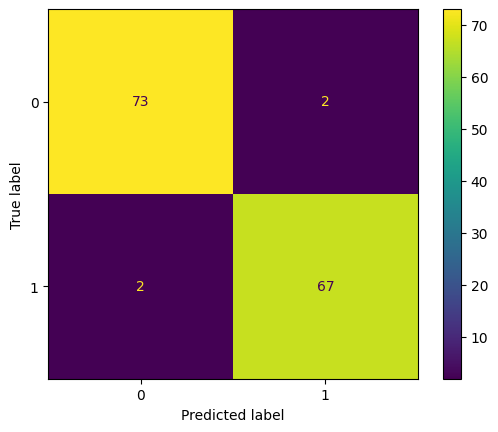

In [10]:
import numpy as np
from sklearn import metrics

eval_df = {'current_label': np.array(y_test), 'predicted_label': predictions}
eval_df = pd.DataFrame(eval_df)

confusion_matrix = metrics.confusion_matrix(np.array(y_test), predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [11]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9722222222222222